# Machine Learning Lab - Diabetes Health Indicators Dataset

**Platform Compatible**: Windows | Mac | Google Colab

This notebook analyzes the Diabetes Health Indicators Dataset from Kaggle.

https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?resource=download


Jadon Swearingen, Andy Su, Emilio Munoz

## Business Understanding (1.5 points total)

**[1.5 points]** In your own words, give an overview of the dataset. Describe the purpose of the data set you selected (i.e., why and how was this data collected in the first place?). What is the prediction task for your data and why are other third parties interested in the result? Once you begin modeling, how well would your prediction algorithm need to perform to be considered useful to these third parties?

Be specific and use your own words to describe the aspects of the data.



The dataset that our group has chosen contains information regarding Diabetes, a chronic disease where individuals lose their ability to regulate their blood sugar levels. While there is no cure for diabetes, there are many ways to mitigate the negative repercussions of the disease. As a result, the purpose of this data set is to create predictive models that allow us to detect early symptoms and signs of diabetes, which will lead to more effective treatment. The data was collected from the 2015 Behavioral Risk Factor Surveillance System (BRFSS), which is an annual health-related telephone survey that collects information on chronic diseases. The original data collected contains responses from over 400,000 individuals with 330 features. The cleaned dataset that we found contains responses from over 250,000 individuals with around 22 selected health indicators. An explanation of each variable can be seen below:

1. Diabetes Binary: Binary, nominal, categorical variable that describes whether an individual has diabetes or not, where 0 = no diabetes and 1 = diabetes.

2. HighBP: Binary, nominal, categorical variable that describes whether an individual has high blood pressure (BP) or not, where 0 = no High BP and 1 = High BP

3. HighChol: Binary, nominal, categorical variable that describes whether an individual has high cholesterol or not, where 0 = no High cholesterol and 1 = High cholesterol

4. CholCheck: Binary, nominal, categorical variable that describes whether an individual has had their cholesterol checked within the last 5 years or not, where 0 = no cholesterol check in 5 years and 1 = yes cholesterol check in 5 years

5. BMI: Continuous, numeric, ratio-level variable that lists individual's Body Mass Index. 

6. Smoker: Binary, nominal, categorical variable that describes whether an individual has smoked at least 100 cigarettes in their lives or not, where 0 = no and 1 = yes

7. Stroke: Binary, nominal, categorical variable that describes whether an individual has ever been told if they have had a stroke or not, where 0 = no and 1 = yes

8. HeartDiseaseOrAttack: Binary, nominal, categorical variable that describes whether an individual has ever had CHD or an MI, where 0 = no and 1 = yes

9. PhysActivity: Binary, nominal, categorical variable that describes whether an individual has exerted physical activity in the past 30 days (not including their job), where 0 = no and 1 = yes

10. Fruits: Binary, nominal, categorical variable that describes whether an individual consumes fruit 1 or more times per day, where 0 = no and 1 = yes

11. Veggies: Binary, nominal, categorical variable that describes whether an individual consumes vegetables 1 or more times per day, where 0 = no and 1 = yes

12. HvyAlcoholConsumption: Binary, nominal, categorical variable that describes whether adult men consume >=14 drinks per week and whether adult women consume >=7 drinkers per week, where 0 = no and 1 = yes

13. AnyHealthcare: Binary, nominal, categorical variable that describes whether an individual has any sort of health care coverage, where 0 = no and 1 = yes

14. NoDocbcCost: Binary, nominal, categorical variable that describes whether an individual has had a time in the past 12 months where they needed to see a doctor, but was unable to due to the cost, where 0 = no and 1 = yes

15. GenHlth: Ordinal categorical variable that describes an individual's opinion on whether their general health is good or not, scaled from 1-5, where 1 = excellent and 5 = poor

16. MentHlth: Discrete, quantitative, ratio-level variable that describes how many days out of the last 30 days that individuals felt like they poor mental health

17. PhysHlth: Discrete, quantitative, ratio-level variable that describes how many days out of the last 30 days that individuals had a physical illness or injury 

18. DiffWalk: Binary, nominal, categorical variable that describes whether an individual has difficult walking or climbing stairs, where 0 = no and 1 = yes

19. Sex: Binary, nominal, categorical variable that describes whether an individual that determiens whether an individual is male or female, where male = 1 and female = 0. 

20. Age: ordinal, categorical variable that describes the age of the individual, where for example, 1 = 18-24, 9 = 60-64, 13 = 80 or older, etc. 

21. Education: Ordinal, categorical variable that describes an individual's educaito level, where 1 = never attended school or only kindergarten, 2 = grades 1-8, 3 = grades 9-11, 4 = high school graduate, 5 = some college or technical school, 6 = college graduate

22. Income: Ordinal, categorical variable that describes an individual's income on an income scale from 1-8. For example, 1 = less than $10,000, 5 = less than $35,000, 8 = $75,000 or more, etc. 

Additionally, the prediction task of this data is to classify the diabetes status of individuals based on health indicators. Of note, there are three separate files in this dataset, each representing a different variation of the original cleaned dataset. While each file possesses the same health indicator features, they are different in how diabetes is labeled and if the classes are balanced or not. For example, diabetes_012 dataset has 3 classes (diabetes, at risk of diabetes, no diabetes), but is not balanced. Each file is a different representation of the same dataset designed for different modeling purposes, but all with the same prediction task. Third parties such as hospitals and insurance companies would be very interested in these results. For instance, hospitals and healthcare providers would be able to use this data to aid in early diagnosis of diabetes, which could reduce healthcare costs in the long run. 

I believe that in order for our prediction algorithm to be useful for third party companies, the algorithm should be able to correctly identify a large percentage of individuals who are at risk, or have diabetes. Models that can not do this will impact the livelihoods of many individuals, which could have devastating health repercussions towards individuals that are affected by the false negative reports.



## 1. Environment Setup & Package Installation

In [50]:
import sys
import platform
import os

# Detect environment
def detect_environment():
    if 'google.colab' in sys.modules:
        return 'colab'
    elif platform.system() == 'Windows':
        return 'windows'
    elif platform.system() == 'Darwin':
        return 'mac'
    elif platform.system() == 'Linux':
        return 'linux'
    else:
        return 'unknown'

env = detect_environment()
print(f"Running on: {env}")
print(f"Python version: {sys.version}")
print(f"Platform: {platform.platform()}")

Running on: windows
Python version: 3.14.3 (tags/v3.14.3:323c59a, Feb  3 2026, 16:04:56) [MSC v.1944 64 bit (AMD64)]
Platform: Windows-11-10.0.26200-SP0


In [51]:
# Install required packages if not already installed
import importlib.util

def check_and_install(package_name, import_name=None):
    """Check if package is installed, install if missing"""
    if import_name is None:
        import_name = package_name
    
    if importlib.util.find_spec(import_name) is None:
        print(f"Installing {package_name}...")
        import subprocess
        subprocess.check_call([sys.executable, "-m", "pip", "install", package_name, "-q"])
        print(f"{package_name} installed successfully!")
    else:
        print(f"{package_name} already installed")

# Core packages
packages = [
    ("pandas", "pandas"),
    ("numpy", "numpy"),
    ("scikit-learn", "sklearn"),
    ("matplotlib", "matplotlib"),
    ("seaborn", "seaborn")
]

for pkg, import_name in packages:
    check_and_install(pkg, import_name)

print("\nAll required packages installed!")

pandas already installed
numpy already installed
scikit-learn already installed
matplotlib already installed
seaborn already installed

All required packages installed!


## 2. Import Libraries

In [52]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# File handling
import glob

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# For Colab: set larger figure sizes
if env == 'colab':
    plt.rcParams['figure.figsize'] = (12, 8)
else:
    plt.rcParams['figure.figsize'] = (10, 6)

print("All libraries imported successfully!")

All libraries imported successfully!


## 3. Dataset Overview

**Available datasets** (from Kaggle - Diabetes Health Indicators):
1. `diabetes_012_health_indicators_BRFSS2015.csv` - Multi-class (0=no diabetes, 1=prediabetes, 2=diabetes)
2. `diabetes_binary_health_indicators_BRFSS2015.csv` - Binary classification (original imbalanced)
3. `diabetes_binary_5050split_health_indicators_BRFSS2015.csv` - Binary classification (balanced)

## Data Understanding (3 points total)

**[1.5 points]** Load the dataset and appropriately define data types. What data type should be used to represent each data attribute? Discuss the attributes collected in the dataset. For datasets with a large number of attributes, only discuss a subset of relevant attributes.

**[1.5 points]** Verify data quality: Explain any missing values or duplicate data. Visualize entries that are missing/complete for different attributes. Are those mistakes? Why do these quality issues exist in the data? How do you deal with these problems? Give justifications for your methods (elimination or imputation).

**Data Quality Assessment**


Data quality was evaluated by looking at missing values, duplicate records, and dataset construction choices. A missing value check showed that all 22 attributes contain complete data, with no null or missing entries across the dataset. This is what we expected, as the dataset is derived from a cleaned and preprocessed version of the BRFSS survey, where incomplete responses were either excluded or imputed prior to release.


To further assess data integrity, duplicate records were examined. There were 1635 duplicate rows (2.3%), but these were determined to be valid survey responses. This is because the data has many categorical columns, and it is statistically likely that the data has duplicates and that they represent valid survey responses, and so removing them would introduce bias.

It is also important to note that the dataset that we chose(diabetes_binary_5050split_health_indicators_BRFSS2015.csv) is a balanced version of the original data, containing an equal number of diabetic and nondiabetic cases. Although this balance is useful for model training and evaluation, it does not reflect the true prevalence of diabetes in the general population. As a result, predictive performance metrics derived from this dataset should be interpreted carefully when considering real world deployment.


Because no missingdata were identified and duplicates warranted, no elimination or imputation procedures were required. The dataset was deemed suitable for exploratory analysis and visualization without additional preprocessing.

**Data Understanding: Attributes and Data Types**

The Diabetes Health Indicators dataset contains 70,692 survey responses and 22 attributes derived from the Behavioral Risk Factor Surveillance System(BRFSS). This is why our data has 70,692 rows and 22 columns.

The dataset has been pre-balanced, and so contains 36346 diabetic and 36346 non-diabetic cases.

The target variable, Diabetes_binary, indicates whether an individual has been diagnosed with diabetes which is labled as (1) or not (0). The remaining features capture a mix of behavioral, clinical, demographic, and self-reported health indicators.


Although all variables are loaded as float64, many features are categorical or binary in nature and should be interpreted accordingly. Binary indicator variables (ex. HighBP, HighChol, Smoker, Stroke, PhysActivity) represent yes/no responses and are treated as binary categorical features. Several attributes such as GenHlth, Age, Education, and Income are ordinal variables encoded numerically to reflect increasing levels (ex., worse to better general health or lower to higher income brackets). Continuous variables include BMI, MentHlth, and PhysHlth, which represent numeric measurements or counts of days.

For the purposes of exploratory analysis and visualization, binary and ordinal variables are treated as categorical features, while BMI and health day variables are treated as continuous. This is an important distinction for selecting appropriate visualization techniques and for future modeling decisions.

In [53]:
# Get the directory where this notebook is located
notebook_dir = os.path.dirname(os.path.abspath("__file__")) if "__file__" in dir() else os.getcwd()

# List available CSV files in the notebook directory
available_files = glob.glob(os.path.join(notebook_dir, "*.csv"))

print("Available dataset files:")
for i, file in enumerate(available_files, 1):
    file_size = os.path.getsize(file) / (1024 * 1024)  # Size in MB
    print(f"{i}. {os.path.basename(file)} ({file_size:.2f} MB)")

if not available_files:
    print("\nNo CSV files found in the notebook directory!")
    print("Please ensure the dataset files are in the same folder as this notebook.")

Available dataset files:
1. diabetes_012_health_indicators_BRFSS2015.csv (21.68 MB)
2. diabetes_binary_5050split_health_indicators_BRFSS2015.csv (6.05 MB)
3. diabetes_binary_health_indicators_BRFSS2015.csv (21.68 MB)


## 4. Load Data

**Choose which dataset to load based on your analysis needs**

In [54]:
# Option 1: Load the balanced binary dataset (recommended for classification)
data_file = "diabetes_binary_5050split_health_indicators_BRFSS2015.csv"

# Option 2: Load the original imbalanced binary dataset
# data_file = "diabetes_binary_health_indicators_BRFSS2015.csv"

# Option 3: Load the multi-class dataset (0, 1, 2)
# data_file = "diabetes_012_health_indicators_BRFSS2015.csv"

# Load the selected dataset
data_path = os.path.join(notebook_dir, data_file)

if os.path.exists(data_path):
    df = pd.read_csv(data_path)
    print(f"Loaded: {data_file}")
    print(f"Shape: {df.shape}")
    print(f"Columns: {df.shape[1]}")
    print(f"Rows: {df.shape[0]:,}")
else:
    print(f"Error: {data_file} not found!")
    print(f"Looking in: {notebook_dir}")

Loaded: diabetes_binary_5050split_health_indicators_BRFSS2015.csv
Shape: (70692, 22)
Columns: 22
Rows: 70,692


## 5. Initial Data Exploration

In [55]:
# Display first few rows
print("First 5 rows:")
df.head()

First 5 rows:


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [56]:
# Dataset info
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth 

In [57]:
# Statistical summary
print("Statistical Summary:")
df.describe()

Statistical Summary:


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,0.788774,0.042721,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,0.408181,0.202228,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [58]:
# Check for missing values
print("Missing Values:")
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values!")

Missing Values:
No missing values!


The 1,635 duplicate rows (2.31%) were retained rather than removed. Because this dataset is derived from a health survey with mostly binary and ordinal features, it is statistically expected that multiple respondents would report identical values across all 21 attributes. Removing these would discard valid data points and could bias the dataset.

In [59]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 1635


In [60]:
# Keep duplicates - these represent distinct survey respondents with identical health profiles
# In a dataset of 70,692 rows with only 21 binary/ordinal features, identical responses are expected
print(f"Total rows: {df.shape[0]}")
print(f"Duplicate rows: {duplicate_count} ({duplicate_count/df.shape[0]*100:.2f}%)")
print("Decision: Retaining duplicates as they represent valid survey responses.")

Total rows: 70692
Duplicate rows: 1635 (2.31%)
Decision: Retaining duplicates as they represent valid survey responses.


In [61]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 1635


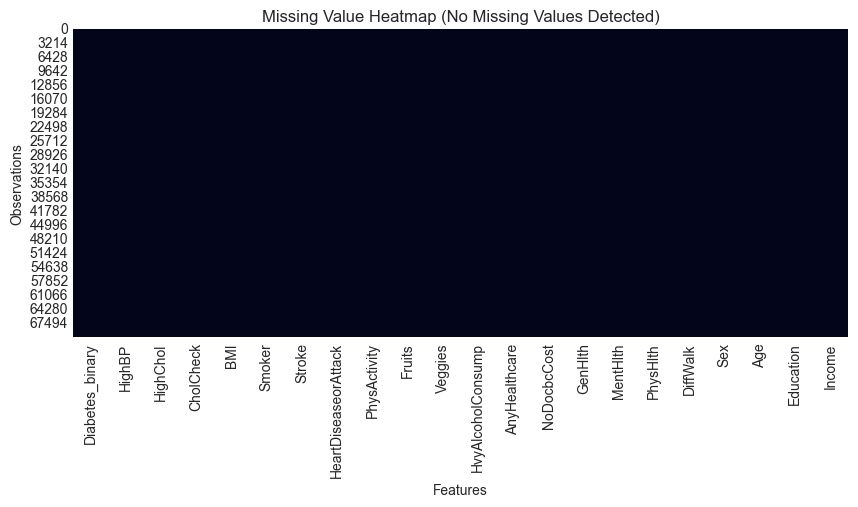

In [62]:
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Value Heatmap (No Missing Values Detected)")
plt.xlabel("Features")
plt.ylabel("Observations")
plt.show()

## 6. Data Visualization

## Data Visualization (4.5 points total)

**[2 points]** Visualize basic feature distributions. That is, plot the dynamic range and exploratory distribution plots (like boxplots, histograms, kernel density estimation) to better understand the data. Describe anything meaningful or potentially useful you discover from these visualizations. These may also help to understand what data is missing or needs imputation. Note: You can also use data from other sources to bolster visualizations. Visualize at least five plots, at least one categorical.

**[2.5 points]** Ask three interesting questions that are relevant to your dataset and explore visuals that help answer these questions. Use whichever visualization method is appropriate for your data. Important: Interpret the implications for each visualization.

C:\Users\jadon\AppData\Local\Temp\ipykernel_29908\2973897425.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Diabetes_binary', palette='Set2')


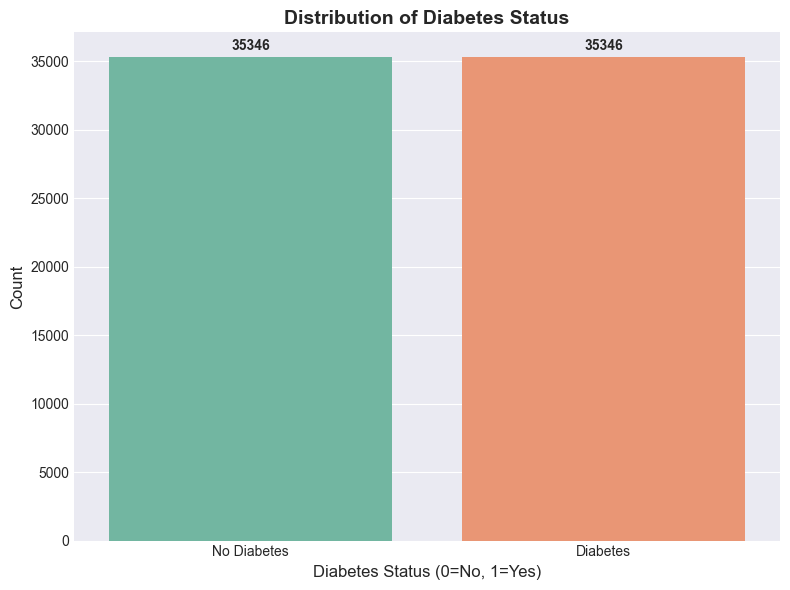

In [63]:
# 1. Distribution of Target Variable (Diabetes_binary) - Categorical
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Diabetes_binary', palette='Set2')
plt.title('Distribution of Diabetes Status', fontsize=14, fontweight='bold')
plt.xlabel('Diabetes Status (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
for i, v in enumerate(df['Diabetes_binary'].value_counts().values):
    plt.text(i, v + 500, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

This first graph tells us that this dataset it completely balanced, in that there is an equal number of no diabetes and diabetes, as crafted by the kaggle dataset. The other two datasets that we have access to were before this equalization.

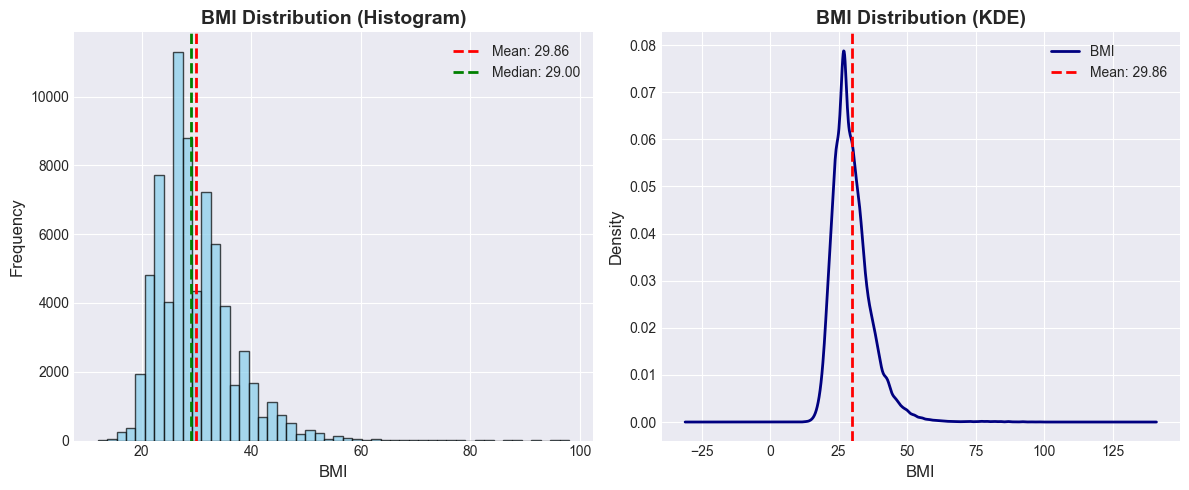

In [64]:
# 2. BMI Distribution - Histogram with KDE
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['BMI'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('BMI Distribution (Histogram)', fontsize=14, fontweight='bold')
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(df['BMI'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["BMI"].mean():.2f}')
plt.axvline(df['BMI'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["BMI"].median():.2f}')
plt.legend()

plt.subplot(1, 2, 2)
df['BMI'].plot(kind='kde', linewidth=2, color='navy')
plt.title('BMI Distribution (KDE)', fontsize=14, fontweight='bold')
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.axvline(df['BMI'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["BMI"].mean():.2f}')
plt.legend()

plt.tight_layout()
plt.show()

This next set of graphs shows us the distribution of the BMI (body mass index) of people. You can see that it is a very steep curve, with some variation, and slight right skew. This tells us that most people are in a normal range, but that some are very high, and since it butts up against 0 not many people are super low. According to the CDC and WHO:

Underweight: Below 18.5

Healthy Weight: 18.5 to 24.9

Overweight: 25.0 to 29.9

Obesity: 30.0 or higher

Class 1: 30.0 to 34.9

Class 2: 35.0 to 39.9

Class 3 (Severe/Morbid Obesity): 40.0 or higher 

These categories would be good to change this variable into potentially, in order to better look at the data. I do this below:

Overall BMI Distribution:
BMI_Category
Obese             44.48
Overweight        34.14
Healthy Weight    20.45
Underweight        0.92
Name: proportion, dtype: float64

BMI Distribution by Diabetes Status (%):
BMI_Category     Healthy Weight  Obese  Overweight  Underweight
Diabetes_binary                                                
0.0                       29.80  30.80       38.03         1.37
1.0                       11.11  58.16       30.25         0.48


Key Findings:
Non-Diabetic Group: 30.8% are obese, 29.8% are healthy weight
Diabetic Group: 58.2% are obese, 11.1% are healthy weight
Difference: Diabetics are 27.4 percentage points more likely to be obese


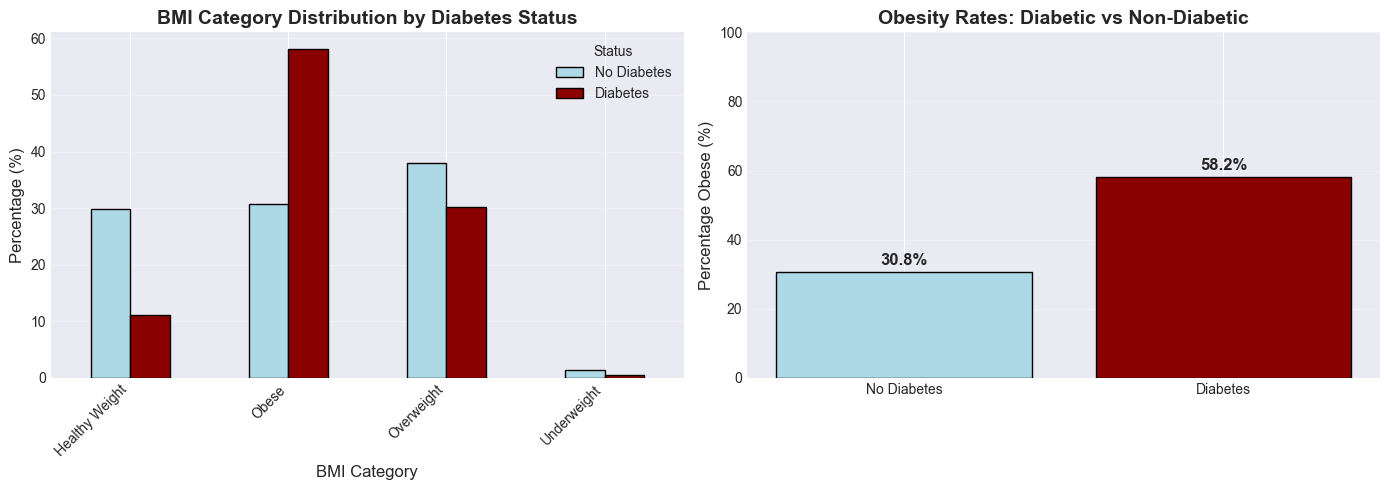

In [65]:
# BMI Category Analysis
# Define BMI categories according to standard medical classifications
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Healthy Weight'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

# Apply BMI categorization
df['BMI_Category'] = df['BMI'].apply(categorize_bmi)

# Calculate overall BMI distribution
bmi_distribution = df['BMI_Category'].value_counts(normalize=True) * 100
print("Overall BMI Distribution:")
print(bmi_distribution.round(2))
print()

# Calculate BMI distribution by Diabetes status
bmi_by_diabetes = df.groupby(['Diabetes_binary', 'BMI_Category']).size().unstack(fill_value=0)
bmi_by_diabetes_pct = bmi_by_diabetes.div(bmi_by_diabetes.sum(axis=1), axis=0) * 100

print("BMI Distribution by Diabetes Status (%):")
print(bmi_by_diabetes_pct.round(2))
print()

# Get specific statistics for writing
no_diabetes_obese = bmi_by_diabetes_pct.loc[0, 'Obese']
diabetes_obese = bmi_by_diabetes_pct.loc[1, 'Obese']
no_diabetes_healthy = bmi_by_diabetes_pct.loc[0, 'Healthy Weight']
diabetes_healthy = bmi_by_diabetes_pct.loc[1, 'Healthy Weight']

print(f"\nKey Findings:")
print(f"Non-Diabetic Group: {no_diabetes_obese:.1f}% are obese, {no_diabetes_healthy:.1f}% are healthy weight")
print(f"Diabetic Group: {diabetes_obese:.1f}% are obese, {diabetes_healthy:.1f}% are healthy weight")
print(f"Difference: Diabetics are {diabetes_obese - no_diabetes_obese:.1f} percentage points more likely to be obese")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Stacked bar chart
bmi_by_diabetes_pct.T.plot(kind='bar', ax=axes[0], color=['lightblue', 'darkred'], edgecolor='black')
axes[0].set_title('BMI Category Distribution by Diabetes Status', fontsize=14, fontweight='bold')
axes[0].set_xlabel('BMI Category', fontsize=12)
axes[0].set_ylabel('Percentage (%)', fontsize=12)
axes[0].legend(['No Diabetes', 'Diabetes'], title='Status')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].grid(axis='y', alpha=0.3)

# Side-by-side comparison for Obese category
obese_comparison = bmi_by_diabetes_pct['Obese']
axes[1].bar(['No Diabetes', 'Diabetes'], obese_comparison.values, 
            color=['lightblue', 'darkred'], edgecolor='black')
axes[1].set_title('Obesity Rates: Diabetic vs Non-Diabetic', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Percentage Obese (%)', fontsize=12)
axes[1].set_ylim(0, 100)
for i, v in enumerate(obese_comparison.values):
    axes[1].text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# clean up
df.drop('BMI_Category', axis=1, inplace=True)

**BMI Category Analysis - Key Findings:**

The analysis reveals a stark difference in BMI distribution between groups:

- **Obesity Rate**: 58.2% of diabetics are obese (BMI ≥ 30) compared to only 30.8% of non-diabetics
- **Healthy Weight**: Only 11.1% of diabetics maintain a healthy weight versus 29.8% of non-diabetics
- **Overweight Category**: The groups are closer than I thought but still seperated

This large difference shows that BMI will be a good indicator of diabetes for our model.

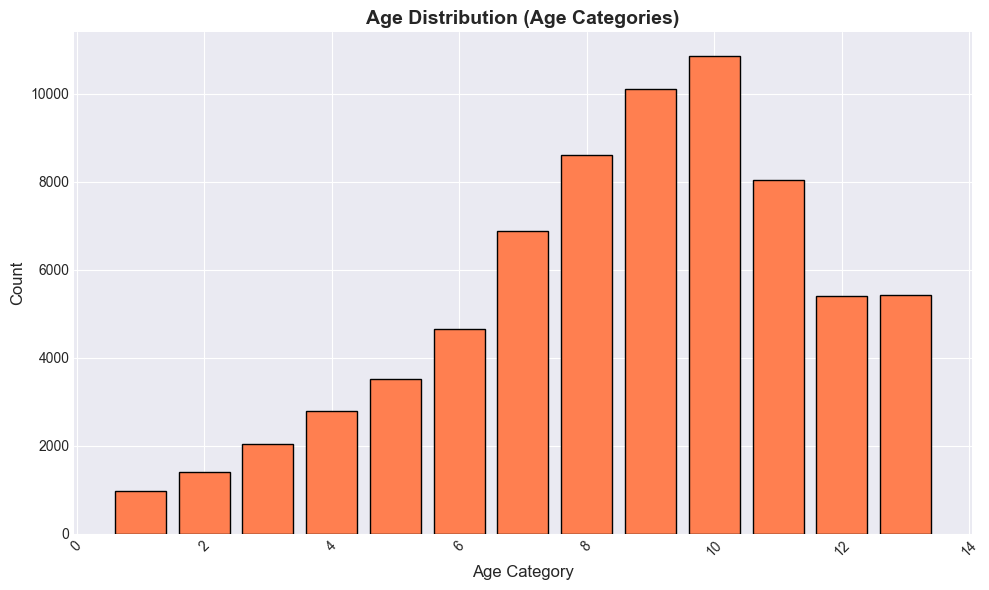

In [66]:
# 3. Age Distribution (Categorical/Ordinal)
plt.figure(figsize=(10, 6))
age_counts = df['Age'].value_counts().sort_index()
plt.bar(age_counts.index, age_counts.values, color='coral', edgecolor='black')
plt.title('Age Distribution (Age Categories)', fontsize=14, fontweight='bold')
plt.xlabel('Age Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Age Categories Explained:**

The Age variable in the BRFSS dataset uses the following encoding:

- 1 = 18-24 years
- 2 = 25-29 years  
- 3 = 30-34 years
- 4 = 35-39 years
- 5 = 40-44 years
- 6 = 45-49 years
- 7 = 50-54 years
- 8 = 55-59 years
- 9 = 60-64 years
- 10 = 65-69 years
- 11 = 70-74 years
- 12 = 75-79 years
- 13 = 80 years or older

This chart shows us the age distribution of the dataset (in categories). You can see that most of the people are in category 10 (65-69) and less in others. This could mean several things:

1. **Survey Response Bias**: Older adults (Medicare-eligible), may be more likely to participate in health-related telephone surveys like BRFSS.

2. **Dataset Balancing Process**: Since this is the balanced 50/50 diabetes dataset, more older respondents may have been needed from the original survey to achieve equal representation of diabetic and non-diabetic cases, as diabetes prevalence increases with age.

3. **Healthcare Engagement**: Older age groups likely will be more engaged with worring about their health and diabetes, which could have led to higher response rates.

The lower representation of younger age groups (18-39) could show that older adults are likely more concerned with diabetes.

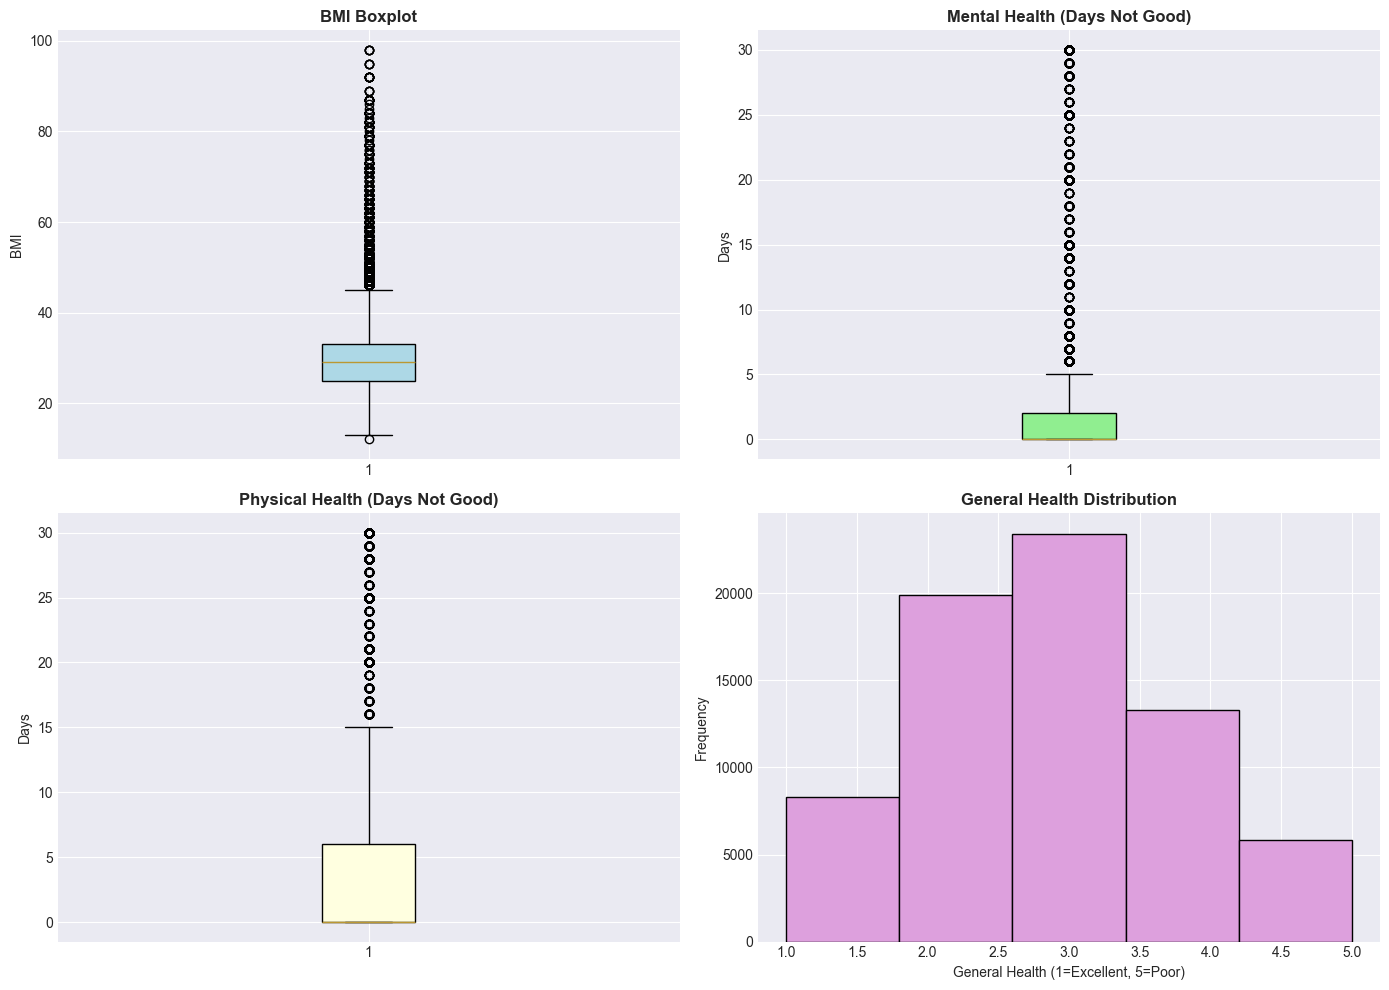

In [67]:
# 4. Boxplots for Key Continuous Variables
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# BMI Boxplot
axes[0, 0].boxplot(df['BMI'], vert=True, patch_artist=True, 
                    boxprops=dict(facecolor='lightblue'))
axes[0, 0].set_title('BMI Boxplot', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('BMI')

# MentHlth Boxplot
axes[0, 1].boxplot(df['MentHlth'], vert=True, patch_artist=True, 
                    boxprops=dict(facecolor='lightgreen'))
axes[0, 1].set_title('Mental Health (Days Not Good)', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Days')

# PhysHlth Boxplot
axes[1, 0].boxplot(df['PhysHlth'], vert=True, patch_artist=True, 
                    boxprops=dict(facecolor='lightyellow'))
axes[1, 0].set_title('Physical Health (Days Not Good)', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Days')

# GenHlth Distribution
axes[1, 1].hist(df['GenHlth'], bins=5, edgecolor='black', color='plum')
axes[1, 1].set_title('General Health Distribution', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('General Health (1=Excellent, 5=Poor)')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

These graphs show a few things about these variables.

1. **BMI Boxplot** This one shows that there is a pretty normal distribution from around 1 to 45ish, and there are many outliers above this. These are people that are severely overweight and not the norm.

2. **Mental health Days not Good** This boxplot shows us that almost everyone is from 0 to 5, but there are some outliers above this.

3. **physical health (days not good)** This boxplot is similar to mental health, going from 0 to 15 and then having outliers. I think that this one could be useful.

4. **general Health Distribution** This one shows the general health distribution of the rows, and shows that most people are 3/5, followed by 2/5 and then the others.

Variables 2 and 3 might be better as binary indicators (0 or any issues) due to a prevalence of 0 values. I expect 1 and 4 to be very useful for prediction, as they seem to be good values for prediciting diabetes.

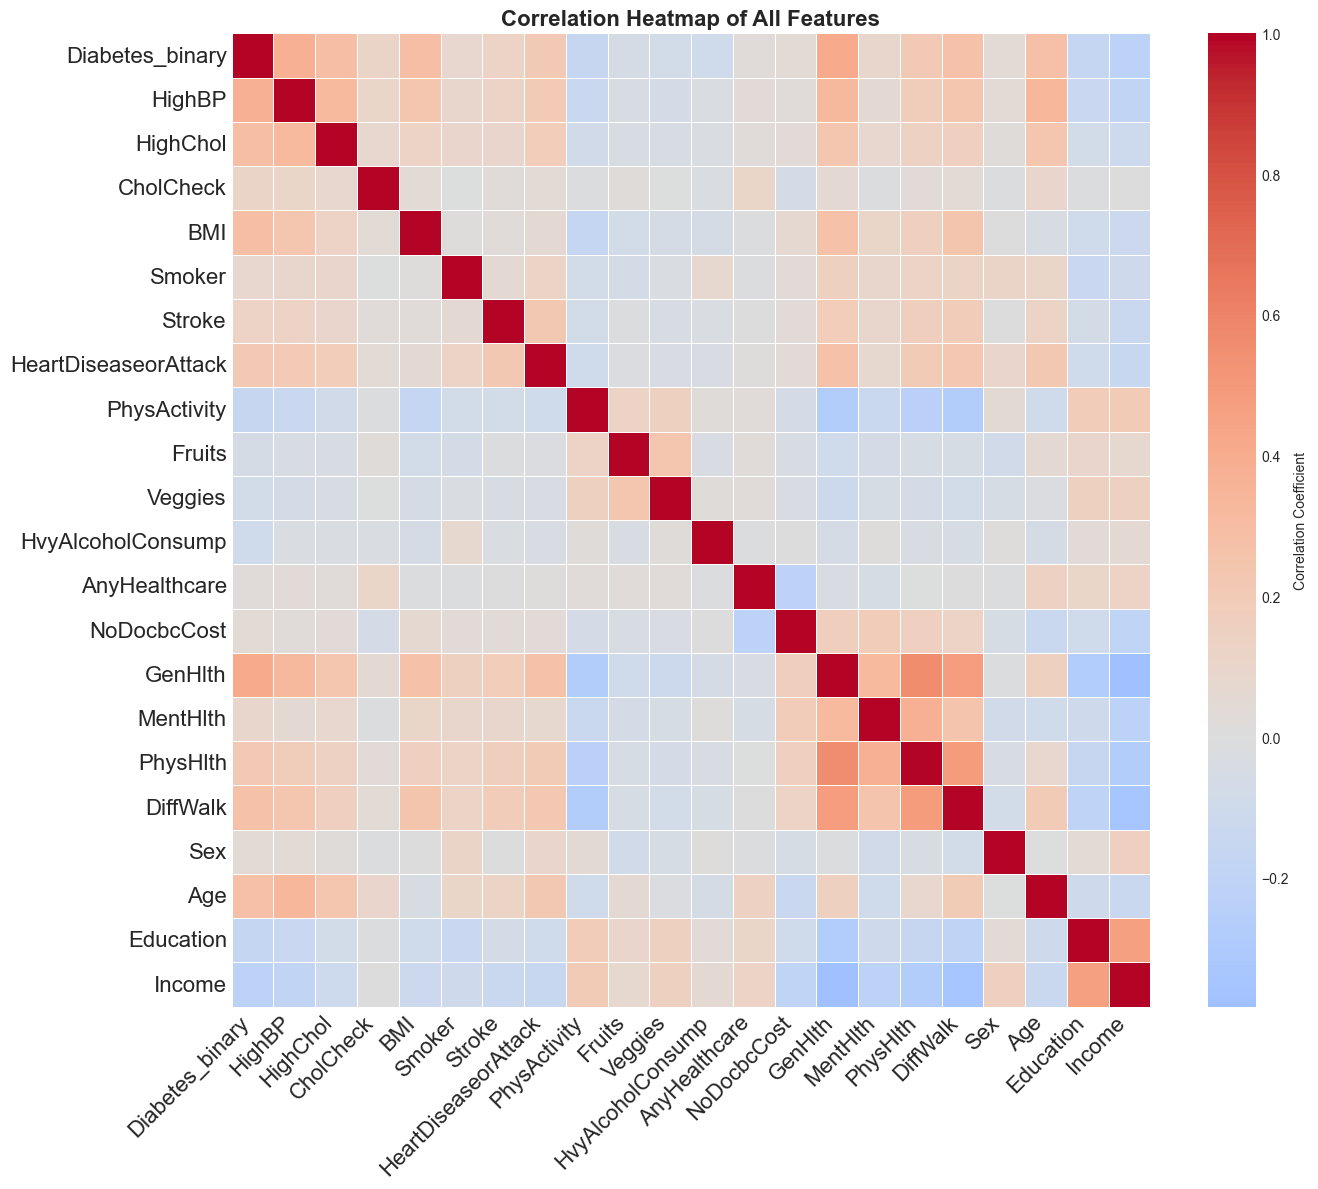

In [68]:
# 5. Correlation Heatmap
plt.figure(figsize=(14, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            linewidths=0.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap of All Features', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16, rotation=45, ha='right')
plt.yticks(fontsize=16, rotation=0)
plt.tight_layout()
plt.show()

In [69]:
# Extract and display top correlations with Diabetes_binary
diabetes_correlations = correlation_matrix['Diabetes_binary'].sort_values(ascending=False)
print("Top 10 Features Correlated with Diabetes:")
print(diabetes_correlations.head(11).round(3))  # 11 to include Diabetes_binary itself
print("\nTop Negative Correlations:")
print(diabetes_correlations.tail(5).round(3))

Top 10 Features Correlated with Diabetes:
Diabetes_binary         1.000
GenHlth                 0.408
HighBP                  0.382
BMI                     0.293
HighChol                0.289
Age                     0.279
DiffWalk                0.273
PhysHlth                0.213
HeartDiseaseorAttack    0.212
Stroke                  0.125
CholCheck               0.115
Name: Diabetes_binary, dtype: float64

Top Negative Correlations:
Veggies             -0.079
HvyAlcoholConsump   -0.095
PhysActivity        -0.159
Education           -0.170
Income              -0.224
Name: Diabetes_binary, dtype: float64


**Correlation Analysis - Key Findings:**

Looking at the corr graph, there are a few things to note. The graph shows the correlation between two variables in an array. This means how much when one moves the other moves. So red it as one goes up the other does also, and blue when one goes up the other goes down. Some things to look at specifically is the highbp, highchol, bmi, heartdiseaserorattack, GenHlth and how they correlate with Diabetes_binary. This is the most important row/col, as it is what we are trying to predict. There are also some other interesting correlations, such as physhlth and menthlth. These matter less, as we are just trying to look at diabetes, but because they make sense they help us to build confidence in our data.

For example, a HighBP shows a correlation of a datapoint with yes for Diabetes_binary

**Strongest Positive Correlations with Diabetes:**
- **GenHlth** (r = 0.408): This is the strongest predictor. It makes sense, because general health would be correlated with diabetes.
- **HighBP** (r = 0.382): High blood pressure shows a strong correlation, indicating that diabetics are much more likely to have high blood pressure.
- **BMI** (r = 0.293): Body mass index demonstrates substantial correlation, aligning with our earlier finding that diabetics are more likely to be obese.
- **HighChol** (r = 0.289): High cholesterol is similarly correlated with diabetes status.

**Negative Correlations (Protective Factors):**
- **Income** (r = -0.224): Higher income is associated with lower diabetes rates, which could be due to better healthcare access or healthier lifestyles.
- **Education** (r = -0.170): Higher education shows a protective effect against diabetes.
- **PhysActivity** (r = -0.159): Physical activity is negatively correlated, meaning more active people are less likely to have diabetes.

**Prediction Expectation**: Based on this correlation analysis, we expect GenHlth, HighBP, BMI, HighChol, Age, and DiffWalk to be the most important features in our classification models, as they show the strongest relationships with diabetes status.

### Three Interesting Questions

**Question 1:** How do health indicators (HighBP, HighChol, BMI) differ between diabetic and non-diabetic individuals?

**Question 2:** What is the relationship between age and diabetes prevalence?

**Question 3:** How do lifestyle factors (PhysActivity, Smoker, Fruits, Veggies) correlate with diabetes status?

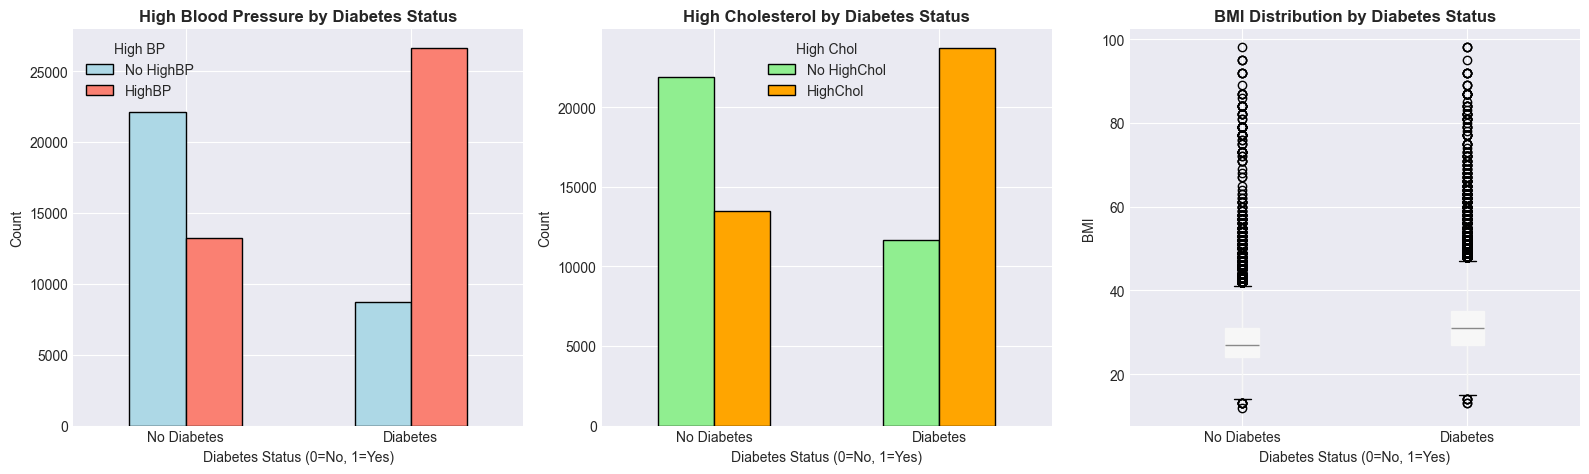

In [70]:
# Question 1: Health Indicators Comparison (HighBP, HighChol, BMI)
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# High Blood Pressure
hbp_data = df.groupby(['Diabetes_binary', 'HighBP']).size().unstack()
hbp_data.plot(kind='bar', ax=axes[0], color=['lightblue', 'salmon'], edgecolor='black')
axes[0].set_title('High Blood Pressure by Diabetes Status', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Diabetes Status (0=No, 1=Yes)')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['No Diabetes', 'Diabetes'], rotation=0)
axes[0].legend(['No HighBP', 'HighBP'], title='High BP')

# High Cholesterol
hchol_data = df.groupby(['Diabetes_binary', 'HighChol']).size().unstack()
hchol_data.plot(kind='bar', ax=axes[1], color=['lightgreen', 'orange'], edgecolor='black')
axes[1].set_title('High Cholesterol by Diabetes Status', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Diabetes Status (0=No, 1=Yes)')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(['No Diabetes', 'Diabetes'], rotation=0)
axes[1].legend(['No HighChol', 'HighChol'], title='High Chol')

# BMI Distribution by Diabetes Status
df.boxplot(column='BMI', by='Diabetes_binary', ax=axes[2], patch_artist=True)
axes[2].set_title('BMI Distribution by Diabetes Status', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Diabetes Status (0=No, 1=Yes)')
axes[2].set_ylabel('BMI')
axes[2].set_xticklabels(['No Diabetes', 'Diabetes'])
plt.suptitle('')  # Remove default title

plt.tight_layout()
plt.show()

These three graphs help to show how a few different health indicators differ between diabetic and non-diabetic. You can see that the distribution differs in all three of these variables. This suggests that these are strong predictive features.

**Interpretation - Question 1: Health Indicators**

1. **High Blood Pressure**: Diabetics show a significantly higher proportion of high blood pressure cases. This suggests that high bp is a good predictive feature

2. **High Cholesterol**: A similar pattern emerges with cholesterol levels, and it seems to be a good predictive feature

3. **BMI Distribution**: The boxplot shows diabetics have a noticeably higher median BMI and interquartile range compared to non-diabetics.The median for diabetics looks to be in the overweight range, while the no diabetes does not, aligning with our earlier analysis.

**Implication**: These three clinical indicators (HighBP, HighChol, BMI) exhibit strong visual separation and will likely be good indicators of diabetes.

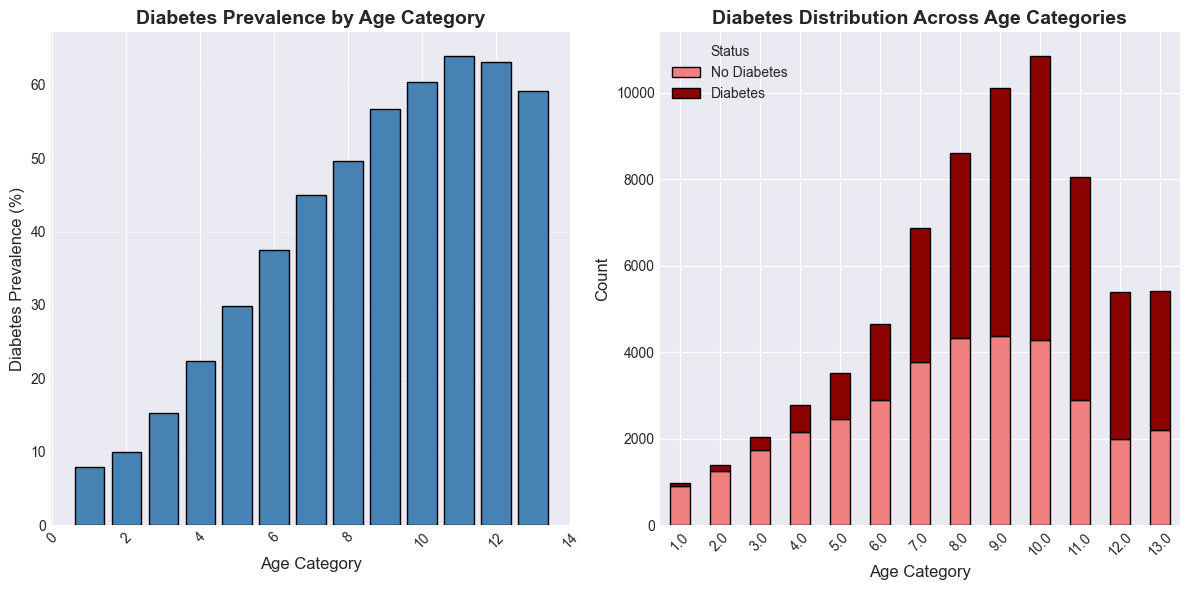

In [71]:
# Question 2: Age vs Diabetes Prevalence
age_diabetes = df.groupby('Age')['Diabetes_binary'].agg(['sum', 'count'])
age_diabetes['prevalence'] = (age_diabetes['sum'] / age_diabetes['count']) * 100

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(age_diabetes.index, age_diabetes['prevalence'], color='steelblue', edgecolor='black')
plt.title('Diabetes Prevalence by Age Category', fontsize=14, fontweight='bold')
plt.xlabel('Age Category', fontsize=12)
plt.ylabel('Diabetes Prevalence (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
age_counts = df.groupby(['Age', 'Diabetes_binary']).size().unstack()
age_counts.plot(kind='bar', stacked=True, ax=plt.gca(), color=['lightcoral', 'darkred'], edgecolor='black')
plt.title('Diabetes Distribution Across Age Categories', fontsize=14, fontweight='bold')
plt.xlabel('Age Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(['No Diabetes', 'Diabetes'], title='Status')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Interpretation - Question 2: Age and Diabetes Prevalence**

The left graph (Diabetes Prevalence by Age Category) reveals a clear and dramatic age-related trend in diabetes risk:

- **Young adults (18-24, category 1)**: shows the lowest of ~8%
- **Middle age (categories 5-9, ages 40-64)**: increases, going from 30% to 57%
- **Seniors (categories 10-13, ages 65+)**: peaks at 65%

This shows that age is a critical risk factor, with the prevalence increasing drastically from 8 to 65 percent. It does start to plateau towards the end.

The right graph shows absolute counts, and clearly shoes that this dataset has many more older people than younger people, which could also be a result of the need to make this dataset balanced.

**Implication** This means that age will also be a big part of our models.

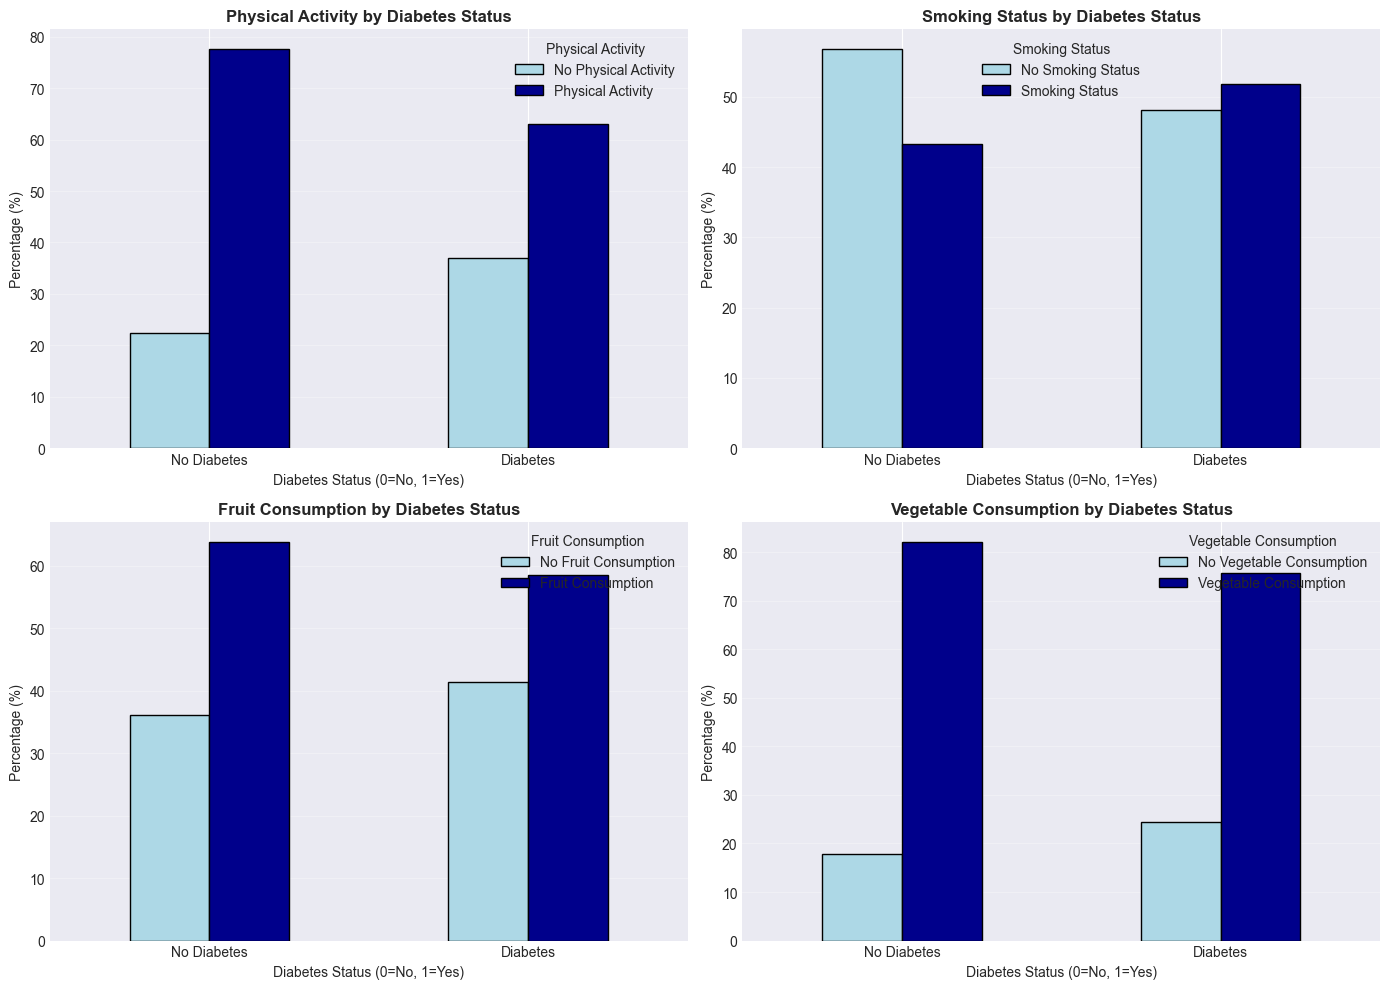

In [72]:
# Question 3: Lifestyle Factors (PhysActivity, Smoker, Fruits, Veggies)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

lifestyle_factors = ['PhysActivity', 'Smoker', 'Fruits', 'Veggies']
titles = ['Physical Activity', 'Smoking Status', 'Fruit Consumption', 'Vegetable Consumption']

for idx, (factor, title) in enumerate(zip(lifestyle_factors, titles)):
    row = idx // 2
    col = idx % 2
    
    factor_data = df.groupby(['Diabetes_binary', factor]).size().unstack()
    factor_pct = factor_data.div(factor_data.sum(axis=1), axis=0) * 100
    
    factor_pct.plot(kind='bar', ax=axes[row, col], color=['lightblue', 'darkblue'], edgecolor='black')
    axes[row, col].set_title(f'{title} by Diabetes Status', fontsize=12, fontweight='bold')
    axes[row, col].set_xlabel('Diabetes Status (0=No, 1=Yes)')
    axes[row, col].set_ylabel('Percentage (%)')
    axes[row, col].set_xticklabels(['No Diabetes', 'Diabetes'], rotation=0)
    axes[row, col].legend([f'No {title}', f'{title}'], title=title)
    axes[row, col].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [73]:
# Calculate specific percentages for lifestyle factors interpretation
lifestyle_stats = {}
for factor in ['PhysActivity', 'Smoker', 'Fruits', 'Veggies']:
    factor_data = df.groupby(['Diabetes_binary', factor]).size().unstack()
    factor_pct = factor_data.div(factor_data.sum(axis=1), axis=0) * 100
    
    no_diabetes_yes = factor_pct.loc[0, 1.0] if 1.0 in factor_pct.columns else 0
    diabetes_yes = factor_pct.loc[1, 1.0] if 1.0 in factor_pct.columns else 0
    
    lifestyle_stats[factor] = {
        'no_diabetes': no_diabetes_yes,
        'diabetes': diabetes_yes,
        'difference': no_diabetes_yes - diabetes_yes
    }
    
    print(f"{factor}:")
    print(f"  Non-diabetic: {no_diabetes_yes:.1f}%")
    print(f"  Diabetic: {diabetes_yes:.1f}%")
    print(f"  Difference: {lifestyle_stats[factor]['difference']:.1f} percentage points\n")

PhysActivity:
  Non-diabetic: 77.6%
  Diabetic: 63.1%
  Difference: 14.5 percentage points

Smoker:
  Non-diabetic: 43.2%
  Diabetic: 51.8%
  Difference: -8.6 percentage points

Fruits:
  Non-diabetic: 63.8%
  Diabetic: 58.5%
  Difference: 5.3 percentage points

Veggies:
  Non-diabetic: 82.1%
  Diabetic: 75.6%
  Difference: 6.5 percentage points



These 4 graphs all show a few different lifestyle factors and their relation to diabetes. You can see that with those with diabetes tend to have a lower percentage of physical activity, higher smoking, slightly lower fruit consumption, and slightly lower vegetable consuption.

These differences are less noticable, suggesting that they are weak predictors. PhysActivity was the highest, with a difference of 14.5%, and so might be more useful, smoker was 8.6%, fruits 5.3% and veggies 6.5%.

## Summary of Exploratory Data Analysis

Before UMAP, here is a summary:

**What We Know About the Dataset:**
- We have 70,692 rows and 22 columns (21 features plus our target Diabetes_binary)
- The dataset is perfectly balanced with 35,346 diabetic and 35,346 non-diabetic cases (50/50 split)
- There are no missing values, and we kept the 1,635 duplicate rows (2.3%) because they are valid survey responses
- All features are stored as float64, but they actually represent a mix of binary, ordinal, and continuous variables

**Strongest Positive Correlations with Diabetes:**
- **GenHlth** (r = 0.408): This is the strongest predictor. I makes sense, because general health would be correlated with diabetes.
- **HighBP** (r = 0.382): High blood pressure shows a strong correlation, indicating that diabetics are much more likely to have high blood pressure.
- **BMI** (r = 0.293): Body mass index demonstrates substantial correlation, aligning with our earlier finding that diabetics are more likely to be obese.
- **HighChol** (r = 0.289): High cholesterol is similarly correlated with diabetes status.

**Negative Correlations (Protective Factors):**
- **Income** (r = -0.224): Higher income is associated with lower diabetes rates, which could be due to better healthcare access or healthier lifestyles.
- **Education** (r = -0.170): Higher education shows a protective effect against diabetes.
- **PhysActivity** (r = -0.159): Physical activity is negatively correlated, meaning more active people are less likely to have diabetes.

**Prediction Expectation**: Based on this correlation analysis, we expect GenHlth, HighBP, BMI, HighChol, Age, and DiffWalk to be the most important features in our classification models, as they show the strongest relationships with diabetes status.

**Key Takeaways:**
- Clinical health markers (HighBP, BMI, HighChol, GenHlth) are way more predictive than lifestyle factors
- Diabetes risk increases a lot with age, creating clear age groups with different risk levels
- Because this dataset is balanced 50/50, our results won't reflect the real world where only about 10-12% of people have diabetes
- There's going to be some overlap no matter what between non-diabetes and diabetes

Now we'll use UMAP to visualize how all 21 of these features work together to separate diabetic from non-diabetic cases across the whole feature space.

## Exceptional Work (1 points total)

**[0.4 points]** The overall quality of the report as a coherent, useful, and polished product will be reflected here. Does it make sense overall? Do your visualizations answer the questions you put forth in your business analysis? Do you properly and consistently cite sources and annotate changes made to base code? Do you provide specific reasons for your assumptions? Do subsequent questions follow naturally from initial exploration?

**[0.6 Points]** Additional analysis:
- **5000 level students**: You have free rein to provide any additional analyses.
- **7000 level students**: Implement dimensionality reduction using uniform manifold approximation and projection (UMAP), then visualize and interpret the results. Give an explanation of UMAP dimensionality reduction methods. You may be interested in the following information:

https://github.com/lmcinnes/umap 

https://pair-code.github.io/understanding-umap/

### UMAP: Uniform Manifold Approximation and Projection

**What is UMAP?**
UMAP (Uniform Manifold Approximation and Projection) reduces the dimensionality of the data kind of like PCA. It is much better though, and can capture complex relationships as well as local and global structure. It works by creating a certain representation fo the data and then reducing it down. It builds a k-nearest neighbor graph first and then uses stochastic gradient decent to lower the dimensionality.

**Key Parameters:**
- `n_neighbors`: Controls local vs. global structure (larger = more global focus)
- `min_dist`: Minimum distance between points in low-dimensional space (controls clustering tightness)
- `metric`: Distance metric used in high-dimensional space

**Why Use UMAP for Diabetes Data?**

We have 21 health indicators. UMAP can help us viasualze how the diabetic vs non-diabetic rows cluster over the whole feature space, helping to reveal patterns and relationships that are across multiple features.

In [74]:
# Install UMAP with compatible dependencies
import subprocess

# Check NumPy version first
import numpy as np_check
np_version = tuple(map(int, np_check.__version__.split('.')[:2]))
print(f"Current NumPy version: {np_check.__version__}")

# Numba (required by UMAP) needs NumPy < 2.4
if np_version >= (2, 4):
    print("Downgrading NumPy to compatible version (< 2.4)...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "numpy<2.4", "-q"])
    print("NumPy downgraded successfully. Please restart the kernel and run this cell again.")
else:
    # NumPy version is compatible, proceed with UMAP installation
    try:
        import umap
        import umap.umap_ as umap_module
        print(f"UMAP already installed (version {umap.__version__})")
    except ImportError:
        print("Installing UMAP...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "umap-learn", "-q"])
        import umap
        import umap.umap_ as umap_module
        print(f"UMAP installed successfully (version {umap.__version__})")

Current NumPy version: 2.3.5
UMAP already installed (version 0.5.11)


In [75]:
# Prepare data for UMAP
# Separate features and target
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

print(f"Feature matrix shape: {X.shape}")
print(f"Features: {list(X.columns)}")

# Standardize the features (important for distance-based algorithms)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\nScaled feature matrix shape: {X_scaled.shape}")
print("Data preparation complete!")

Feature matrix shape: (70692, 21)
Features: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

Scaled feature matrix shape: (70692, 21)
Data preparation complete!


In [76]:
# Apply UMAP with different parameter settings
print("Running UMAP dimensionality reduction...")
print("This may take a few minutes with 70,692 samples...")

# Import UMAP
import umap

# UMAP with balanced parameters
reducer = umap.UMAP(
    n_neighbors=15,        # Balance between local and global structure
    min_dist=0.1,          # Allow some spread between points
    n_components=2,        # Reduce to 2D for visualization
    metric='euclidean',    # Standard distance metric
    random_state=42,       # For reproducibility
    verbose=True
)

# Fit and transform the data
embedding = reducer.fit_transform(X_scaled)

print(f"\nUMAP embedding shape: {embedding.shape}")
print("UMAP reduction complete!")

Running UMAP dimensionality reduction...
This may take a few minutes with 70,692 samples...
UMAP(n_jobs=1, random_state=42, verbose=True)
Thu Feb 12 01:30:06 2026 Construct fuzzy simplicial set
Thu Feb 12 01:30:06 2026 Finding Nearest Neighbors
Thu Feb 12 01:30:06 2026 Building RP forest with 18 trees


c:\Users\jadon\Coding\ML\MachineLearning2026Lab1\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Thu Feb 12 01:30:07 2026 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	Stopping threshold met -- exiting after 3 iterations
Thu Feb 12 01:30:09 2026 Finished Nearest Neighbor Search
Thu Feb 12 01:30:10 2026 Construct embedding


Epochs completed:   2%| ▏          3/200 [00:00]

	completed  0  /  200 epochs


Epochs completed:  12%| █▏         23/200 [00:02]

	completed  20  /  200 epochs


Epochs completed:  21%| ██         42/200 [00:05]

	completed  40  /  200 epochs


Epochs completed:  32%| ███▏       63/200 [00:08]

	completed  60  /  200 epochs


Epochs completed:  41%| ████       82/200 [00:10]

	completed  80  /  200 epochs


Epochs completed:  51%| █████      102/200 [00:13]

	completed  100  /  200 epochs


Epochs completed:  61%| ██████     122/200 [00:15]

	completed  120  /  200 epochs


Epochs completed:  72%| ███████▏   143/200 [00:18]

	completed  140  /  200 epochs


Epochs completed:  81%| ████████   162/200 [00:20]

	completed  160  /  200 epochs


Epochs completed:  91%| █████████  182/200 [00:23]

	completed  180  /  200 epochs


Epochs completed: 100%| ██████████ 200/200 [00:25]

Thu Feb 12 01:30:58 2026 Finished embedding

UMAP embedding shape: (70692, 2)
UMAP reduction complete!


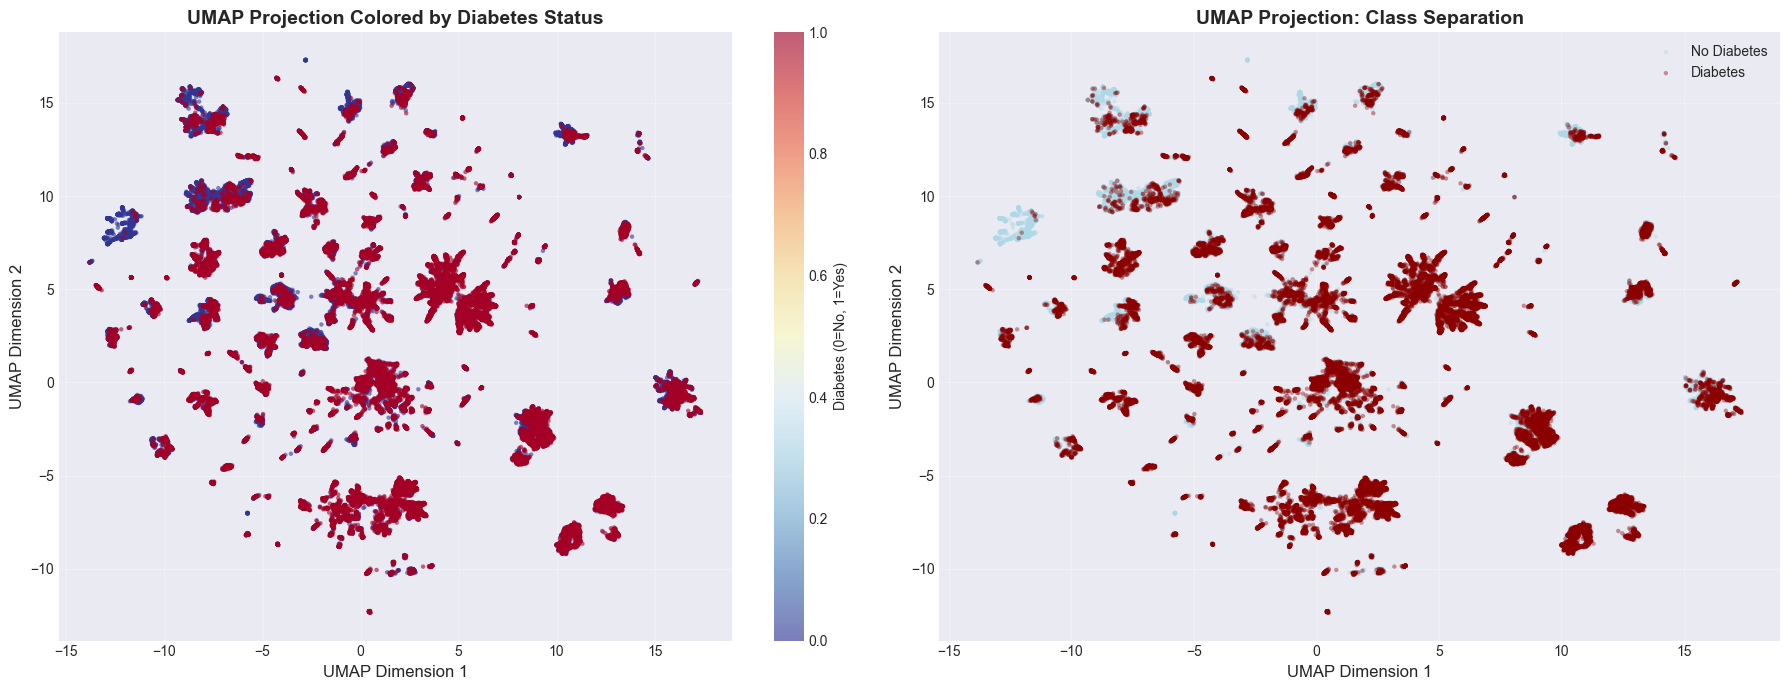


Embedding Statistics:
Dimension 1 - Min: -13.82, Max: 17.36
Dimension 2 - Min: -12.38, Max: 17.30


In [77]:
# Visualize UMAP results
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot 1: Colored by Diabetes Status
scatter1 = axes[0].scatter(
    embedding[:, 0], 
    embedding[:, 1], 
    c=y, 
    cmap='RdYlBu_r',
    alpha=0.6,
    s=10,
    edgecolors='none'
)
axes[0].set_title('UMAP Projection Colored by Diabetes Status', fontsize=14, fontweight='bold')
axes[0].set_xlabel('UMAP Dimension 1', fontsize=12)
axes[0].set_ylabel('UMAP Dimension 2', fontsize=12)
cbar1 = plt.colorbar(scatter1, ax=axes[0])
cbar1.set_label('Diabetes (0=No, 1=Yes)', fontsize=10)
axes[0].grid(alpha=0.3)

# Plot 2: Separate scatter plots for each class
no_diabetes = y == 0
diabetes = y == 1

axes[1].scatter(
    embedding[no_diabetes, 0], 
    embedding[no_diabetes, 1],
    c='lightblue',
    alpha=0.4,
    s=10,
    label='No Diabetes',
    edgecolors='none'
)
axes[1].scatter(
    embedding[diabetes, 0], 
    embedding[diabetes, 1],
    c='darkred',
    alpha=0.4,
    s=10,
    label='Diabetes',
    edgecolors='none'
)
axes[1].set_title('UMAP Projection: Class Separation', fontsize=14, fontweight='bold')
axes[1].set_xlabel('UMAP Dimension 1', fontsize=12)
axes[1].set_ylabel('UMAP Dimension 2', fontsize=12)
axes[1].legend(fontsize=10, loc='best')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Print some statistics
print(f"\nEmbedding Statistics:")
print(f"Dimension 1 - Min: {embedding[:, 0].min():.2f}, Max: {embedding[:, 0].max():.2f}")
print(f"Dimension 2 - Min: {embedding[:, 1].min():.2f}, Max: {embedding[:, 1].max():.2f}")

Looking at these graphs, you can see that there is definitely separation from those with diabetes and those without diabetes. however, You can see that there is also overlap. This means that although we should be able to get decent accuracy from models, we won't be able to get to 100% without overfitting. Some data points, given the data that we are given, will simply be a toss up. Additionally, you can see that there are defintely enclaves of boh diabetes and non-diabetes where our model should be able to do super good.

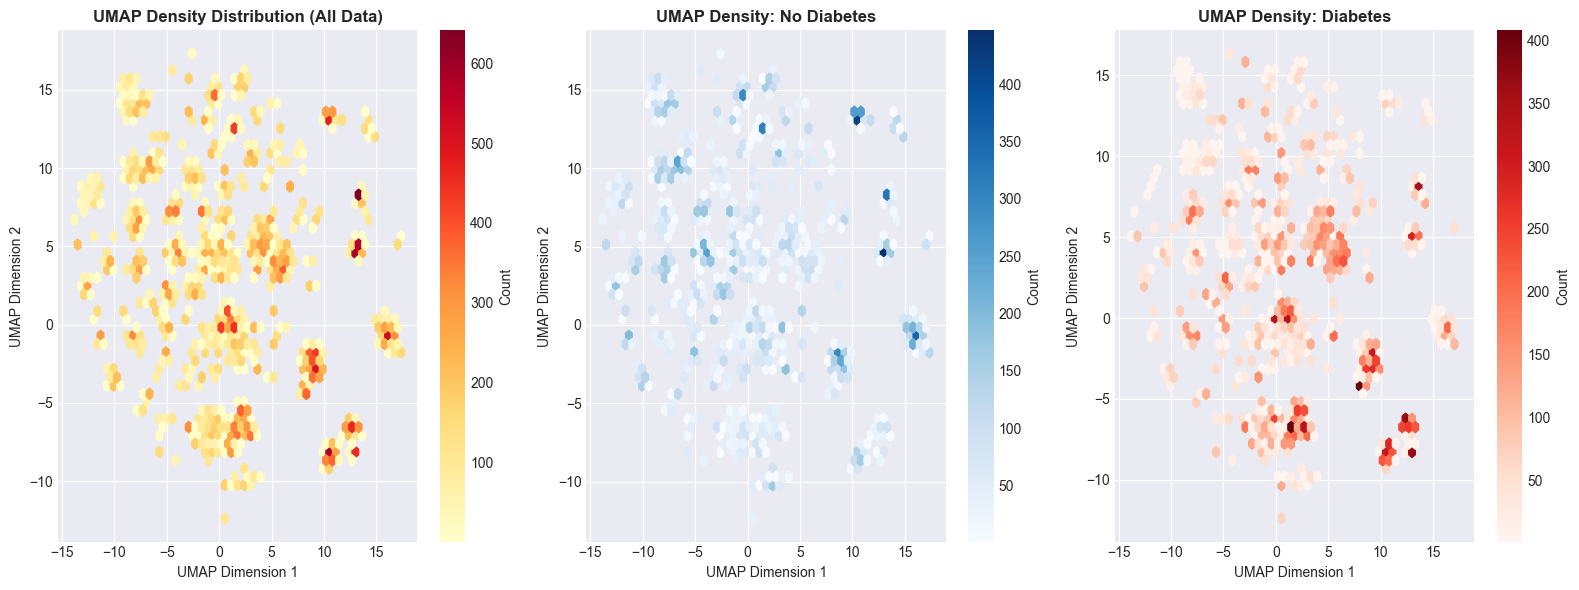

In [78]:
# Additional visualization: Density plot
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.hexbin(embedding[:, 0], embedding[:, 1], gridsize=50, cmap='YlOrRd', mincnt=1)
plt.colorbar(label='Count')
plt.title('UMAP Density Distribution (All Data)', fontsize=12, fontweight='bold')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

plt.subplot(1, 3, 2)
plt.hexbin(embedding[no_diabetes, 0], embedding[no_diabetes, 1], 
           gridsize=50, cmap='Blues', mincnt=1)
plt.colorbar(label='Count')
plt.title('UMAP Density: No Diabetes', fontsize=12, fontweight='bold')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

plt.subplot(1, 3, 3)
plt.hexbin(embedding[diabetes, 0], embedding[diabetes, 1], 
           gridsize=50, cmap='Reds', mincnt=1)
plt.colorbar(label='Count')
plt.title('UMAP Density: Diabetes', fontsize=12, fontweight='bold')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

plt.tight_layout()
plt.show()

Here are a few more graphs that help to show the density of the data points and where they fall. You can see that there are certain parts of the umap dimensions that belong to those with diabetes and all fall into similar categories, and there are also parts of the no diabetes that fall into the same categories.

**Next Steps**

Feature engineering, model selection and comparison, and careful evaluation given what we have learned through this first lab.